##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE173468**

file previously downloaded:
GSE173468_RAW.tar

unzipped using 
``` bash
tar -xvf GSE173468_RAW.tar
```

This gives the following files: 
* GSM5268284_N3-6-6_barcodes.tsv.gz
* GSM5268284_N3-6-6_features.tsv.gz
* GSM5268284_N3-6-6_matrix.mtx.gz
* GSM5268285_N5-6-6_barcodes.tsv.gz
* GSM5268285_N5-6-6_features.tsv.gz
* GSM5268285_N5-6-6_matrix.mtx.gz
* GSM5268286_N6-6-6_barcodes.tsv.gz
* GSM5268286_N6-6-6_features.tsv.gz
* GSM5268286_N6-6-6_matrix.mtx.gz
* GSM5268287_T10-6-6_barcodes.tsv.gz
* GSM5268287_T10-6-6_features.tsv.gz
* GSM5268287_T10-6-6_matrix.mtx.gz
* GSM5268288_T13-6-6_barcodes.tsv.gz
* GSM5268288_T13-6-6_features.tsv.gz
* GSM5268288_T13-6-6_matrix.mtx.gz
* GSM5268289_T14-6-6_barcodes.tsv.gz
* GSM5268289_T14-6-6_features.tsv.gz
* GSM5268289_T14-6-6_matrix.mtx.gz
* GSM5268290_T1-6-6_barcodes.tsv.gz
* GSM5268290_T1-6-6_features.tsv.gz
* GSM5268290_T1-6-6_matrix.mtx.gz
* GSM5268291_T19-6-6_barcodes.tsv.gz
* GSM5268291_T19-6-6_features.tsv.gz
* GSM5268291_T19-6-6_matrix.mtx.gz
* GSM5268292_T22_6-6_barcodes.tsv.gz
* GSM5268292_T22_6-6_features.tsv.gz
* GSM5268292_T22_6-6_matrix.mtx.gz
* GSM5268293_T25_6-6_barcodes.tsv.gz
* GSM5268293_T25_6-6_features.tsv.gz
* GSM5268293_T25_6-6_matrix.mtx.gz
* GSM5268294_T26_6-6_barcodes.tsv.gz
* GSM5268294_T26_6-6_features.tsv.gz
* GSM5268294_T26_6-6_matrix.mtx.gz
* GSM5268295_T27_6-6_barcodes.tsv.gz
* GSM5268295_T27_6-6_features.tsv.gz
* GSM5268295_T27_6-6_matrix.mtx.gz
* GSM5268296_T29Met_6-6_barcodes.tsv.gz
* GSM5268296_T29Met_6-6_features.tsv.gz
* GSM5268296_T29Met_6-6_matrix.mtx.gz
* GSM5268297_T29Primer_6-6_barcodes.tsv.gz
* GSM5268297_T29Primer_6-6_features.tsv.gz
* GSM5268297_T29Primer_6-6_matrix.mtx.gz
* GSM5268298_T3-6-6_barcodes.tsv.gz
* GSM5268298_T3-6-6_features.tsv.gz
* GSM5268298_T3-6-6_matrix.mtx.gz
* GSM5268299_T5-6-6_barcodes.tsv.gz
* GSM5268299_T5-6-6_features.tsv.gz
* GSM5268299_T5-6-6_matrix.mtx.gz
* GSM5268300_T6-6-6_barcodes.tsv.gz
* GSM5268300_T6-6-6_features.tsv.gz
* GSM5268300_T6-6-6_matrix.mtx.gz
* GSM5268301_T8-6-6_barcodes.tsv.gz
* GSM5268301_T8-6-6_features.tsv.gz
* GSM5268301_T8-6-6_matrix.mtx.gz


Files were then organised into seperate folders for each patient and named with correct file names.

In [3]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE173468')
getwd()

[1] "/scratch/user/s4436039/scdata/GSE173468"

[1] "/scratch/user/s4436039/scdata/GSE173468"

In [4]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Loading required package: SeuratObject

Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.3.2”



Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Warning message:
“package ‘patchwork’ was built under R version 4.3.2”


In [9]:
#load all datasets
N3.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/N3")
N5.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/N5")
N6.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/N6")
T1.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T1")
T3.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T3")
T5.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T5")
T6.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T6")
T8.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T8")
T10.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T10")
T13.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T13")
T14.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T14")
T19.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T19")
T22.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T22")
T25.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T25")
T26.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T26")
T27.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T27")
T29Met.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T29Met")
T29Prim.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T29Primer")


In [10]:
#Add dataset info to colnames
colnames(N3.data) <- paste0("GSE173468_N3_", colnames(N3.data))
colnames(N5.data) <- paste0("GSE173468_N5_", colnames(N5.data))
colnames(N6.data) <- paste0("GSE173468_N6_", colnames(N6.data))
colnames(T1.data) <- paste0("GSE173468_T1_", colnames(T1.data))
colnames(T3.data) <- paste0("GSE173468_T3_", colnames(T3.data))
colnames(T5.data) <- paste0("GSE173468_T5_", colnames(T5.data))
colnames(T6.data) <- paste0("GSE173468_T6_", colnames(T6.data))
colnames(T8.data) <- paste0("GSE173468_T8_", colnames(T8.data))
colnames(T10.data) <- paste0("GSE173468_T10_", colnames(T10.data))
colnames(T13.data) <- paste0("GSE173468_T13_", colnames(T13.data))
colnames(T14.data) <- paste0("GSE173468_T14_", colnames(T14.data))
colnames(T19.data) <- paste0("GSE173468_T19_", colnames(T19.data))
colnames(T22.data) <- paste0("GSE173468_T22_", colnames(T22.data))
colnames(T25.data) <- paste0("GSE173468_T25_", colnames(T25.data))
colnames(T26.data) <- paste0("GSE173468_T26_", colnames(T26.data))
colnames(T27.data) <- paste0("GSE173468_T27_", colnames(T27.data))
colnames(T29Met.data) <- paste0("GSE173468_T29Met_", colnames(T29Met.data))
colnames(T29Prim.data) <- paste0("GSE173468_T29Primary_", colnames(T29Prim.data))

In [13]:
head(colnames(T29Met.data))

[1] "GSE173468_T29Met_AAACCTGAGACCTAGG-1" "GSE173468_T29Met_AAACCTGAGACTGTAA-1"
[3] "GSE173468_T29Met_AAACCTGAGCCAGTAG-1" "GSE173468_T29Met_AAACCTGAGCCTCGTG-1"
[5] "GSE173468_T29Met_AAACCTGAGTATCTCG-1" "GSE173468_T29Met_AAACCTGCACGCCAGT-1"

In [14]:
#create seperate seurat object for each sample
N3 <- CreateSeuratObject(counts = N3.data, project = "GSE173468", min.cells = 3, min.features = 200)

#add metadata to sample
N3@meta.data$sample_type <- "healthy"
N3@meta.data$cancer_type <- "HNSCC_healthy"
N3@meta.data$patient_id <- "N3"

In [15]:
#Repeat for remaining samples

#create seperate seurat object for each sample
N5 <- CreateSeuratObject(counts = N5.data, project = "GSE173468", min.cells = 3, min.features = 200)

#add metadata to sample
N5@meta.data$sample_type <- "healthy"
N5@meta.data$cancer_type <- "HNSCC_healthy"
N5@meta.data$patient_id <- "N5"

#create seperate seurat object for each sample
N6 <- CreateSeuratObject(counts = N6.data, project = "GSE173468", min.cells = 3, min.features = 200)

#add metadata to sample
N6@meta.data$sample_type <- "healthy"
N6@meta.data$cancer_type <- "HNSCC_healthy"
N6@meta.data$patient_id <- "N6"

#create seperate seurat object for each sample
T1 <- CreateSeuratObject(counts = T1.data, project = "GSE173468", min.cells = 3, min.features = 200)

#add metadata to sample
T1@meta.data$sample_type <- "tumour"
T1@meta.data$cancer_type <- "HNSCC"
T1@meta.data$patient_id <- "T1"

#create seperate seurat object for each sample
T3 <- CreateSeuratObject(counts = T3.data, project = "GSE173468", min.cells = 3, min.features = 200)

#add metadata to sample
T3@meta.data$sample_type <- "tumour"
T3@meta.data$cancer_type <- "HNSCC"
T3@meta.data$patient_id <- "T3"

#create seperate seurat object for each sample
T5 <- CreateSeuratObject(counts = T5.data, project = "GSE173468", min.cells = 3, min.features = 200)

#add metadata to sample
T5@meta.data$sample_type <- "tumour"
T5@meta.data$cancer_type <- "HNSCC"
T5@meta.data$patient_id <- "T5"

#create seperate seurat object for each sample
T6 <- CreateSeuratObject(counts = T6.data, project = "GSE173468", min.cells = 3, min.features = 200)

#add metadata to sample
T6@meta.data$sample_type <- "tumour"
T6@meta.data$cancer_type <- "HNSCC"
T6@meta.data$patient_id <- "T6"

#create seperate seurat object for each sample
T8 <- CreateSeuratObject(counts = T8.data, project = "GSE173468", min.cells = 3, min.features = 200)

#add metadata to sample
T8@meta.data$sample_type <- "tumour"
T8@meta.data$cancer_type <- "HNSCC"
T8@meta.data$patient_id <- "T8"

#create seperate seurat object for each sample
T10 <- CreateSeuratObject(counts = T10.data, project = "GSE173468", min.cells = 3, min.features = 200)

#add metadata to sample
T10@meta.data$sample_type <- "tumour"
T10@meta.data$cancer_type <- "HNSCC"
T10@meta.data$patient_id <- "T10"

#create seperate seurat object for each sample
T13 <- CreateSeuratObject(counts = T13.data, project = "GSE173468", min.cells = 3, min.features = 200)

#add metadata to sample
T13@meta.data$sample_type <- "tumour"
T13@meta.data$cancer_type <- "HNSCC"
T13@meta.data$patient_id <- "T13"

#create seperate seurat object for each sample
T14 <- CreateSeuratObject(counts = T14.data, project = "GSE173468", min.cells = 3, min.features = 200)

#add metadata to sample
T14@meta.data$sample_type <- "tumour"
T14@meta.data$cancer_type <- "HNSCC"
T14@meta.data$patient_id <- "T14"

#create seperate seurat object for each sample
T19 <- CreateSeuratObject(counts = T19.data, project = "GSE173468", min.cells = 3, min.features = 200)

#add metadata to sample
T19@meta.data$sample_type <- "tumour"
T19@meta.data$cancer_type <- "HNSCC"
T19@meta.data$patient_id <- "T19"

#create seperate seurat object for each sample
T22 <- CreateSeuratObject(counts = T22.data, project = "GSE173468", min.cells = 3, min.features = 200)

#add metadata to sample
T22@meta.data$sample_type <- "tumour"
T22@meta.data$cancer_type <- "HNSCC"
T22@meta.data$patient_id <- "T22"

#create seperate seurat object for each sample
T25 <- CreateSeuratObject(counts = T25.data, project = "GSE173468", min.cells = 3, min.features = 200)

#add metadata to sample
T25@meta.data$sample_type <- "tumour"
T25@meta.data$cancer_type <- "HNSCC"
T25@meta.data$patient_id <- "T25"

#create seperate seurat object for each sample
T26 <- CreateSeuratObject(counts = T26.data, project = "GSE173468", min.cells = 3, min.features = 200)

#add metadata to sample
T26@meta.data$sample_type <- "tumour"
T26@meta.data$cancer_type <- "HNSCC"
T26@meta.data$patient_id <- "T26"

#create seperate seurat object for each sample
T27 <- CreateSeuratObject(counts = T27.data, project = "GSE173468", min.cells = 3, min.features = 200)

#add metadata to sample
T27@meta.data$sample_type <- "tumour"
T27@meta.data$cancer_type <- "HNSCC"
T27@meta.data$patient_id <- "T27"

#create seperate seurat object for each sample
T29Met <- CreateSeuratObject(counts = T29Met.data, project = "GSE173468", min.cells = 3, min.features = 200)

#add metadata to sample
T29Met@meta.data$sample_type <- "tumour"
T29Met@meta.data$cancer_type <- "HNSCC"
T29Met@meta.data$patient_id <- "T29Met"

#create seperate seurat object for each sample
T29Prim <- CreateSeuratObject(counts = T29Prim.data, project = "GSE173468", min.cells = 3, min.features = 200)

#add metadata to sample
T29Prim@meta.data$sample_type <- "tumour"
T29Prim@meta.data$cancer_type <- "HNSCC"
T29Prim@meta.data$patient_id <- "T29Prim"

In [16]:
head(T29Prim@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample_type,cancer_type,patient_id
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>
GSE173468_T29Primary_AAACCTGAGTCATGCT-1,GSE173468,12527,2676,tumour,HNSCC,T29Prim
GSE173468_T29Primary_AAACCTGGTCACCTAA-1,GSE173468,16158,4842,tumour,HNSCC,T29Prim
GSE173468_T29Primary_AAACCTGGTCCAAGTT-1,GSE173468,3040,1426,tumour,HNSCC,T29Prim
GSE173468_T29Primary_AAACCTGTCTGTCCGT-1,GSE173468,15494,3619,tumour,HNSCC,T29Prim
GSE173468_T29Primary_AAACGGGAGAGGTTGC-1,GSE173468,1584,675,tumour,HNSCC,T29Prim
GSE173468_T29Primary_AAACGGGCAAACTGTC-1,GSE173468,3105,1573,tumour,HNSCC,T29Prim


In [17]:
#Merge seurat objects

HNSCC <- merge(N3, y = c(N5, N6, T1, T3, T5, T6, T8, T10, T13, T14, T19, T22, T25, T26, T27, T29Met, T29Prim), project = "GSE173468")

In [18]:
HNSCC
head(HNSCC@meta.data)
tail(HNSCC@meta.data)

An object of class Seurat 
25144 features across 85677 samples within 1 assay 
Active assay: RNA (25144 features, 0 variable features)
 18 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, counts.17, counts.18

,orig.ident,nCount_RNA,nFeature_RNA,sample_type,cancer_type,patient_id
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>
GSE173468_N3_AAACCTGAGAGCCTAG-1,GSE173468,2128,817,healthy,HNSCC_healthy,N3
GSE173468_N3_AAACCTGCAAGAAGAG-1,GSE173468,2158,682,healthy,HNSCC_healthy,N3
GSE173468_N3_AAACCTGGTCTCCATC-1,GSE173468,4827,1330,healthy,HNSCC_healthy,N3
GSE173468_N3_AAACCTGTCTATGTGG-1,GSE173468,3379,1434,healthy,HNSCC_healthy,N3
GSE173468_N3_AAACGGGAGGGTTTCT-1,GSE173468,849,478,healthy,HNSCC_healthy,N3
GSE173468_N3_AAACGGGCAATACGCT-1,GSE173468,6315,2460,healthy,HNSCC_healthy,N3


,orig.ident,nCount_RNA,nFeature_RNA,sample_type,cancer_type,patient_id
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>
GSE173468_T29Primary_TTTGTCAAGCTGGAAC-1,GSE173468,23573,4658,tumour,HNSCC,T29Prim
GSE173468_T29Primary_TTTGTCAAGGCATTGG-1,GSE173468,19689,1661,tumour,HNSCC,T29Prim
GSE173468_T29Primary_TTTGTCAAGTGCGATG-1,GSE173468,13218,3570,tumour,HNSCC,T29Prim
GSE173468_T29Primary_TTTGTCACACAGCGTC-1,GSE173468,1846,839,tumour,HNSCC,T29Prim
GSE173468_T29Primary_TTTGTCAGTGCCTTGG-1,GSE173468,2152,974,tumour,HNSCC,T29Prim
GSE173468_T29Primary_TTTGTCATCAAAGACA-1,GSE173468,25634,4303,tumour,HNSCC,T29Prim


Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


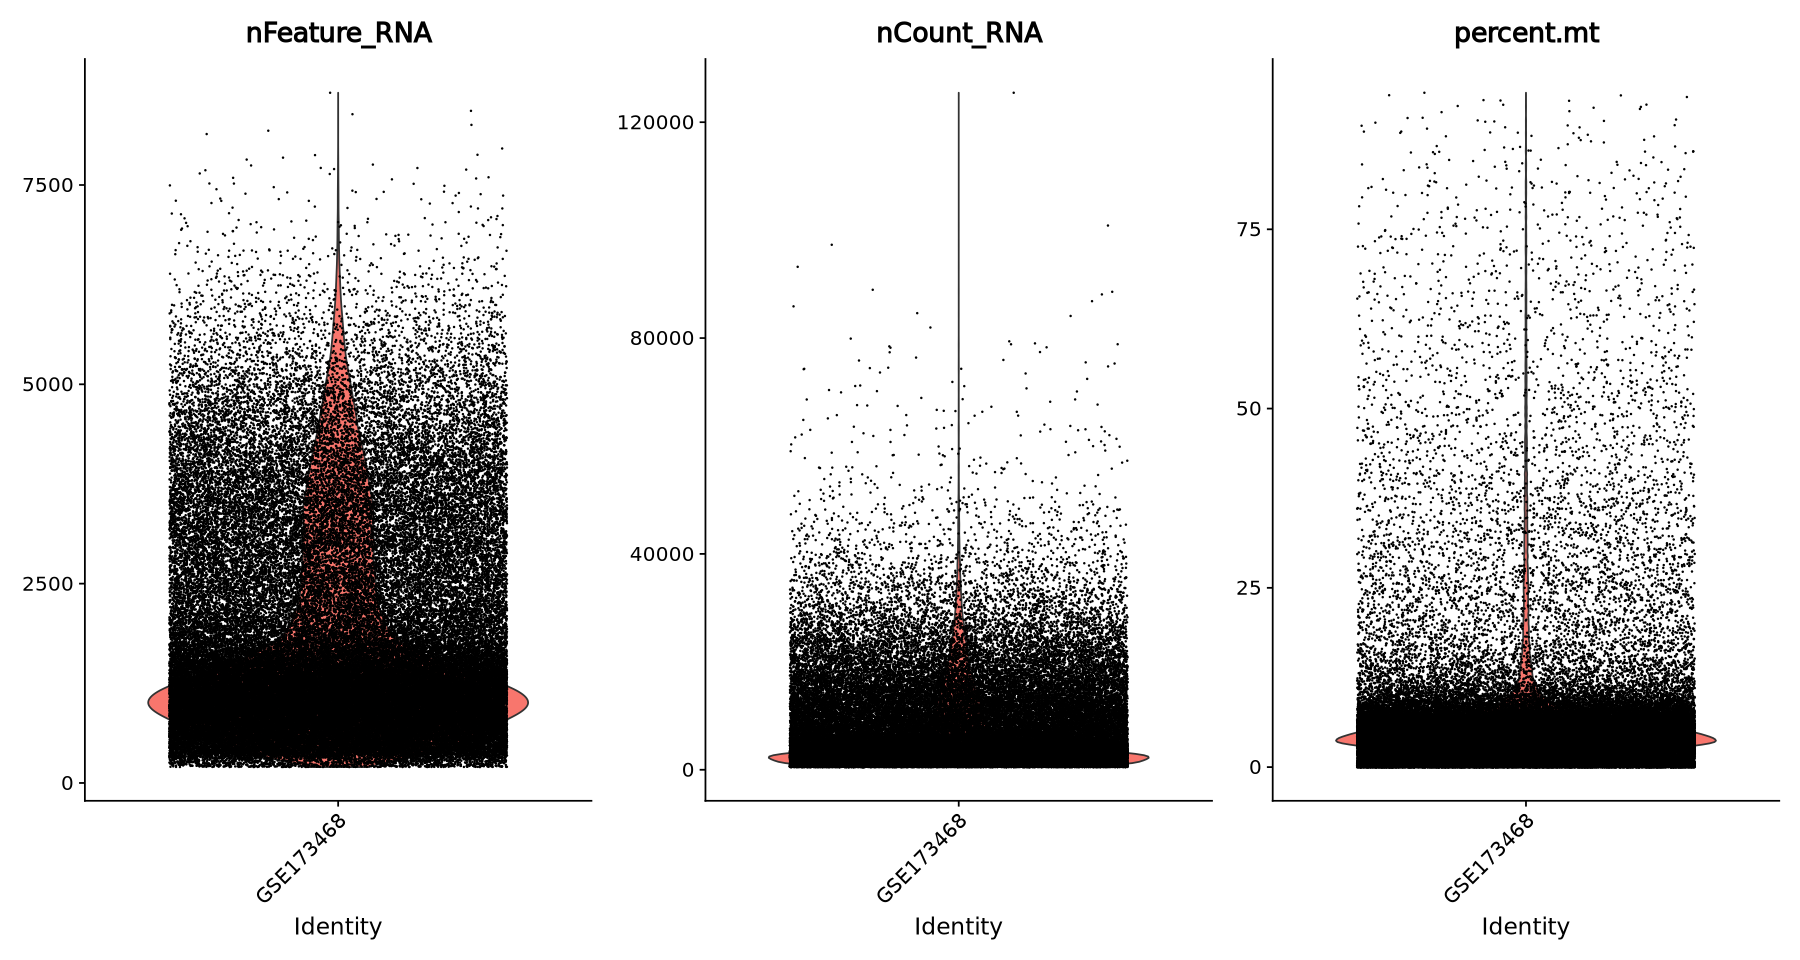

In [19]:
#QC Steps 
HNSCC[["percent.mt"]] <- PercentageFeatureSet(HNSCC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(HNSCC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [20]:
#Normalise the data
HNSCC <- NormalizeData(HNSCC)
#Find variable features
HNSCC <- FindVariableFeatures(HNSCC, selection.method = "vst", nfeatures = 2000)
#Scale the data
HNSCC <- ScaleData(HNSCC, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run pca
HNSCC <- RunPCA(HNSCC, features = VariableFeatures(object = HNSCC))

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Normalizing layer: counts.8

Normalizing layer: counts.9

Normalizing layer: counts.10

Normalizing layer: counts.11

Normalizing layer: counts.12

Normalizing layer: counts.13

Normalizing layer: counts.14

Normalizing layer: counts.15

Normalizing layer: counts.16

Normalizing layer: counts.17

Normalizing layer: counts.18

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Finding variable features for layer counts.6

Finding variable features for layer counts.7

Finding variable features for layer counts.8

Finding variable features for layer counts.9

Finding variable features for layer counts.10

Finding 

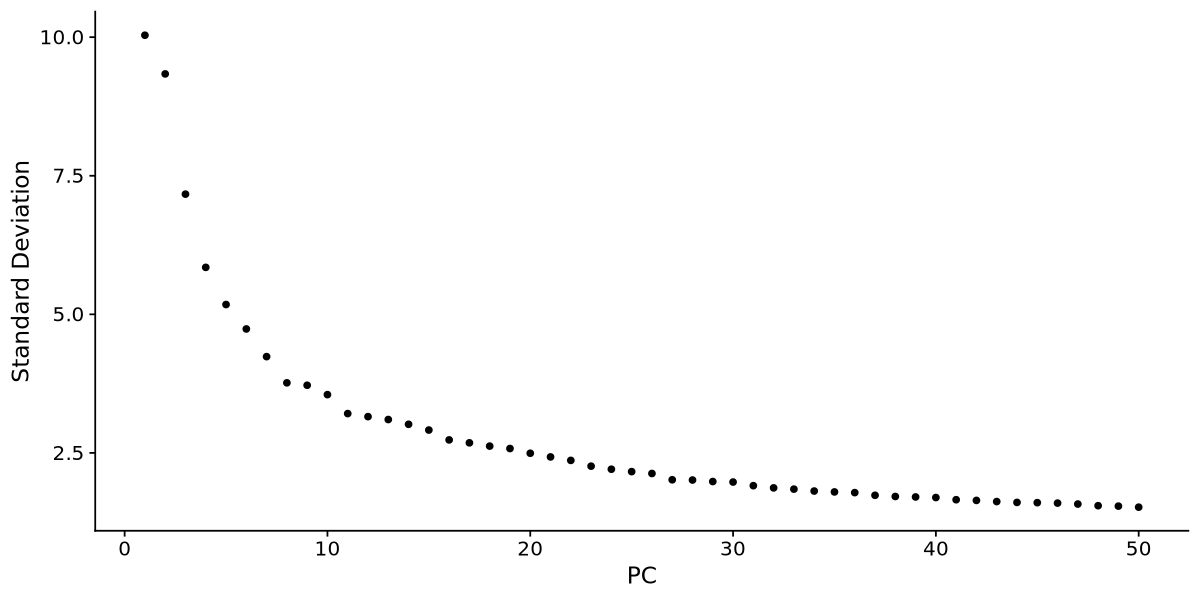

In [22]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(HNSCC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [23]:
#Find neighbours (make sure number matches no. features chosen above)
HNSCC <- FindNeighbors(HNSCC, dims = 1:40)

Computing nearest neighbor graph



Computing SNN



In [24]:
#Run UMAP
HNSCC <- RunUMAP(HNSCC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
18:51:22 UMAP embedding parameters a = 0.9922 b = 1.112

18:51:22 Read 85677 rows and found 40 numeric columns

18:51:22 Using Annoy for neighbor search, n_neighbors = 30

18:51:22 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:51:29 Writing NN index file to temp file /scratch/temp/8847363/RtmpSMAERQ/file1fec432b130d43

18:51:29 Searching Annoy index using 1 thread, search_k = 3000

18:51:55 Annoy recall = 100%

18:51:55 Commencing smooth kNN distance calibration using 1 thread
 with 

In [25]:
#Cluster, resolution here set to 0.2
HNSCC <- FindClusters(HNSCC, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 85677
Number of edges: 3133073

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9697
Number of communities: 22
Elapsed time: 28 seconds


1 singletons identified. 21 final clusters.



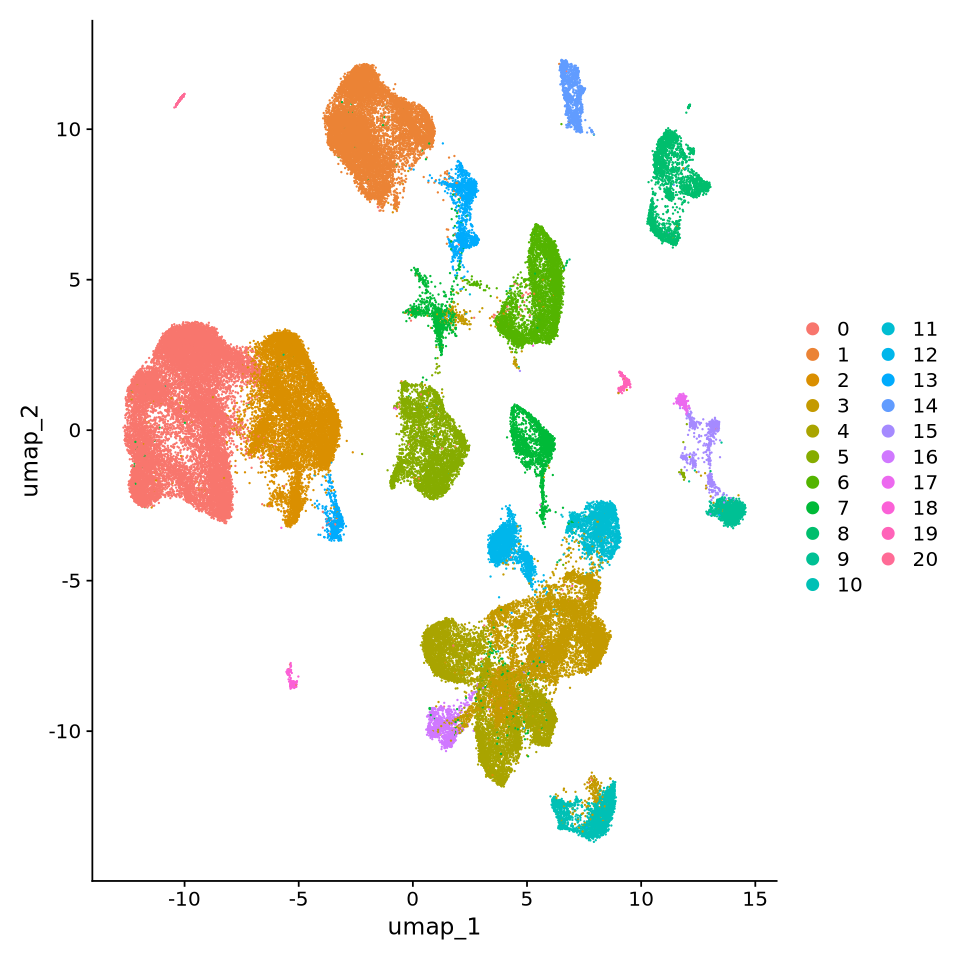

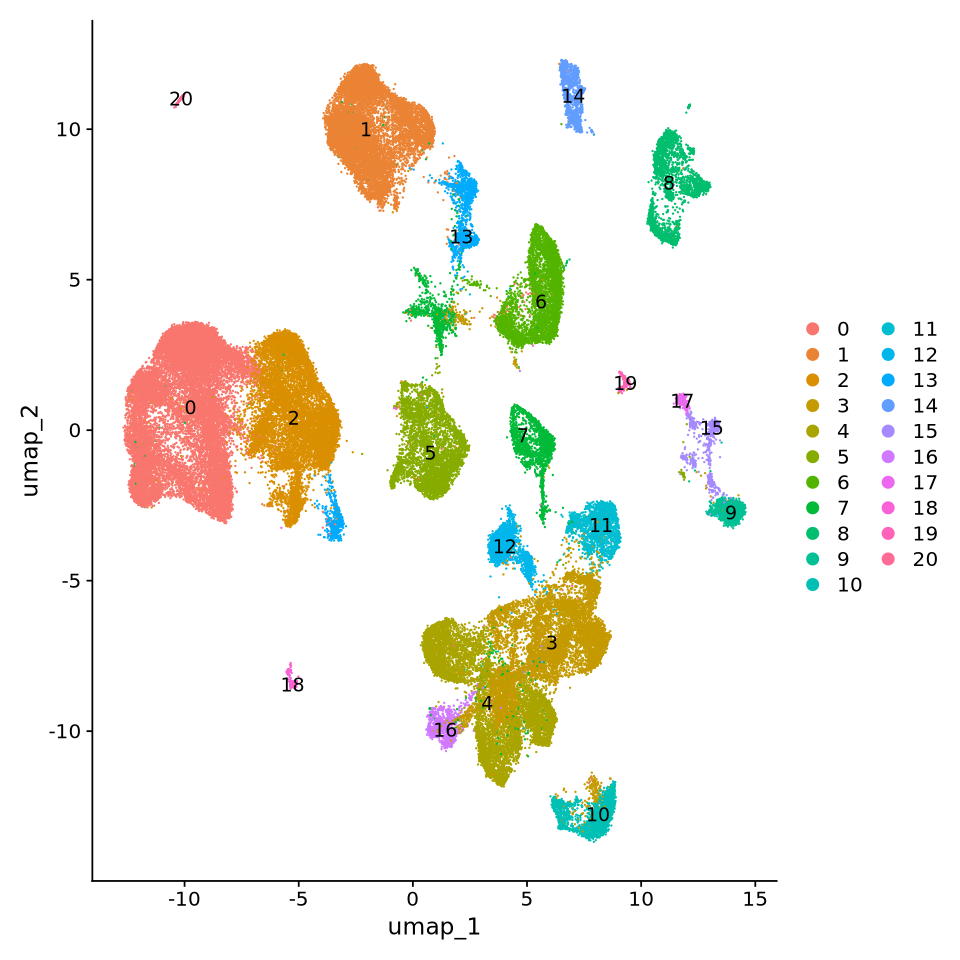

In [26]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=8)
DimPlot(HNSCC, reduction = "umap")
DimPlot(HNSCC, reduction = "umap", label=TRUE)

In [27]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(HNSCC, file = "/scratch/user/s4436039/scdata/GSE173468/GSE173468.RDS")

### Next part of code is about determining which cluster is the myeloid cells

In [29]:
#Violin plots of classic markers
#ITGAX = CD11c
#ITGAM = CD11b
#BDCA2 = CLEC4C
#FCGR3A = CD16a
options(repr.plot.height=40, repr.plot.width=10)
VlnPlot(HNSCC, features = c("CLEC9A", "CD1C", "FCER1A", "HLA-DRA", "ITGAX", "ITGAM", "CLEC4C", "LAMP3", "CD3D", "CD19", "CD14", "FCGR3A"), ncol=1)

ERROR: Error in if (all(data[, feature] == data[, feature][1])) {: missing value where TRUE/FALSE needed


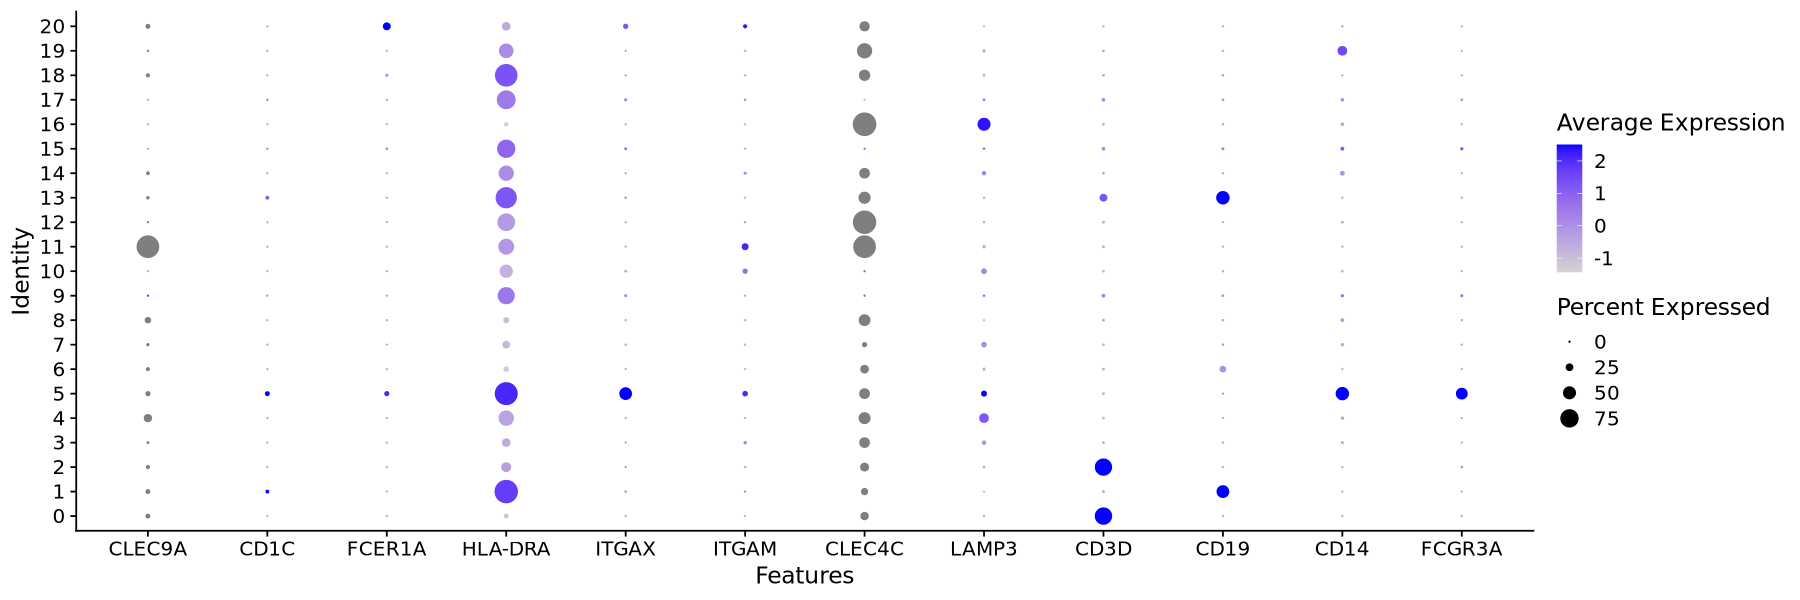

In [30]:
#Same as above but dot plot
options(repr.plot.height=5, repr.plot.width=15)
DotPlot(HNSCC, features = c("CLEC9A", "CD1C", "FCER1A", "HLA-DRA", "ITGAX", "ITGAM", "CLEC4C", "LAMP3", "CD3D", "CD19", "CD14", "FCGR3A"))

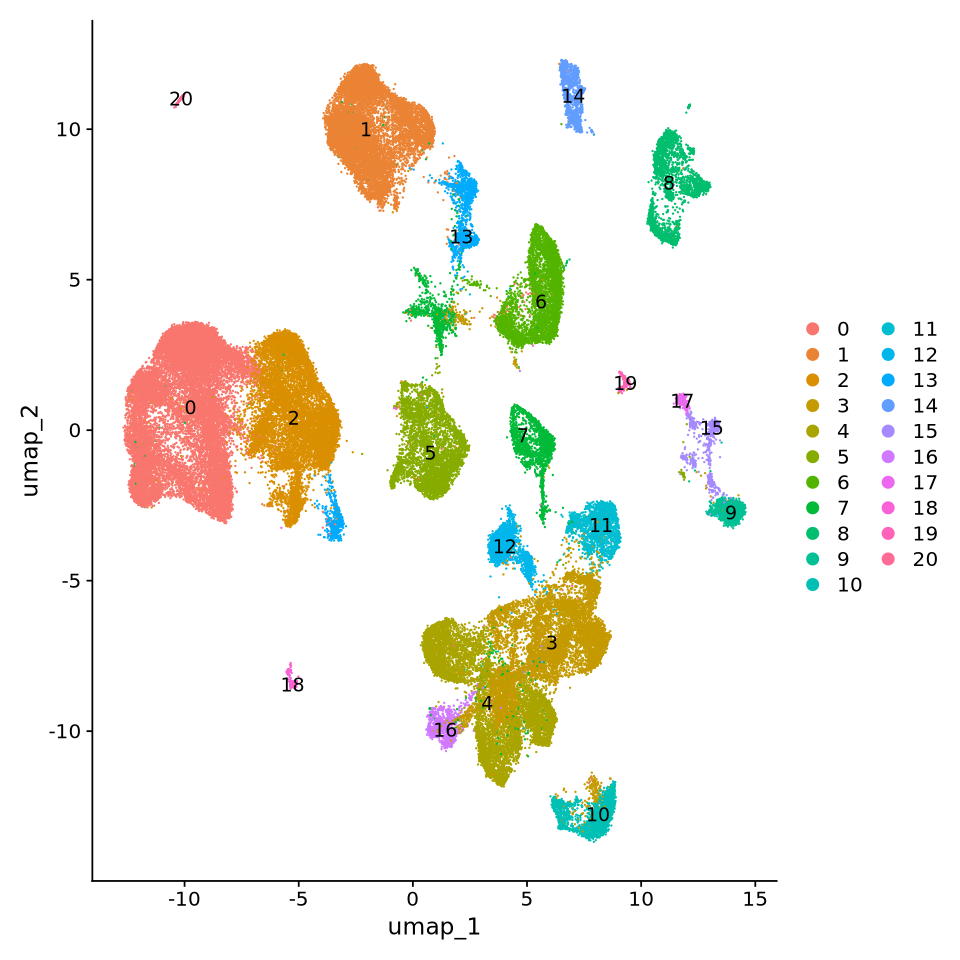

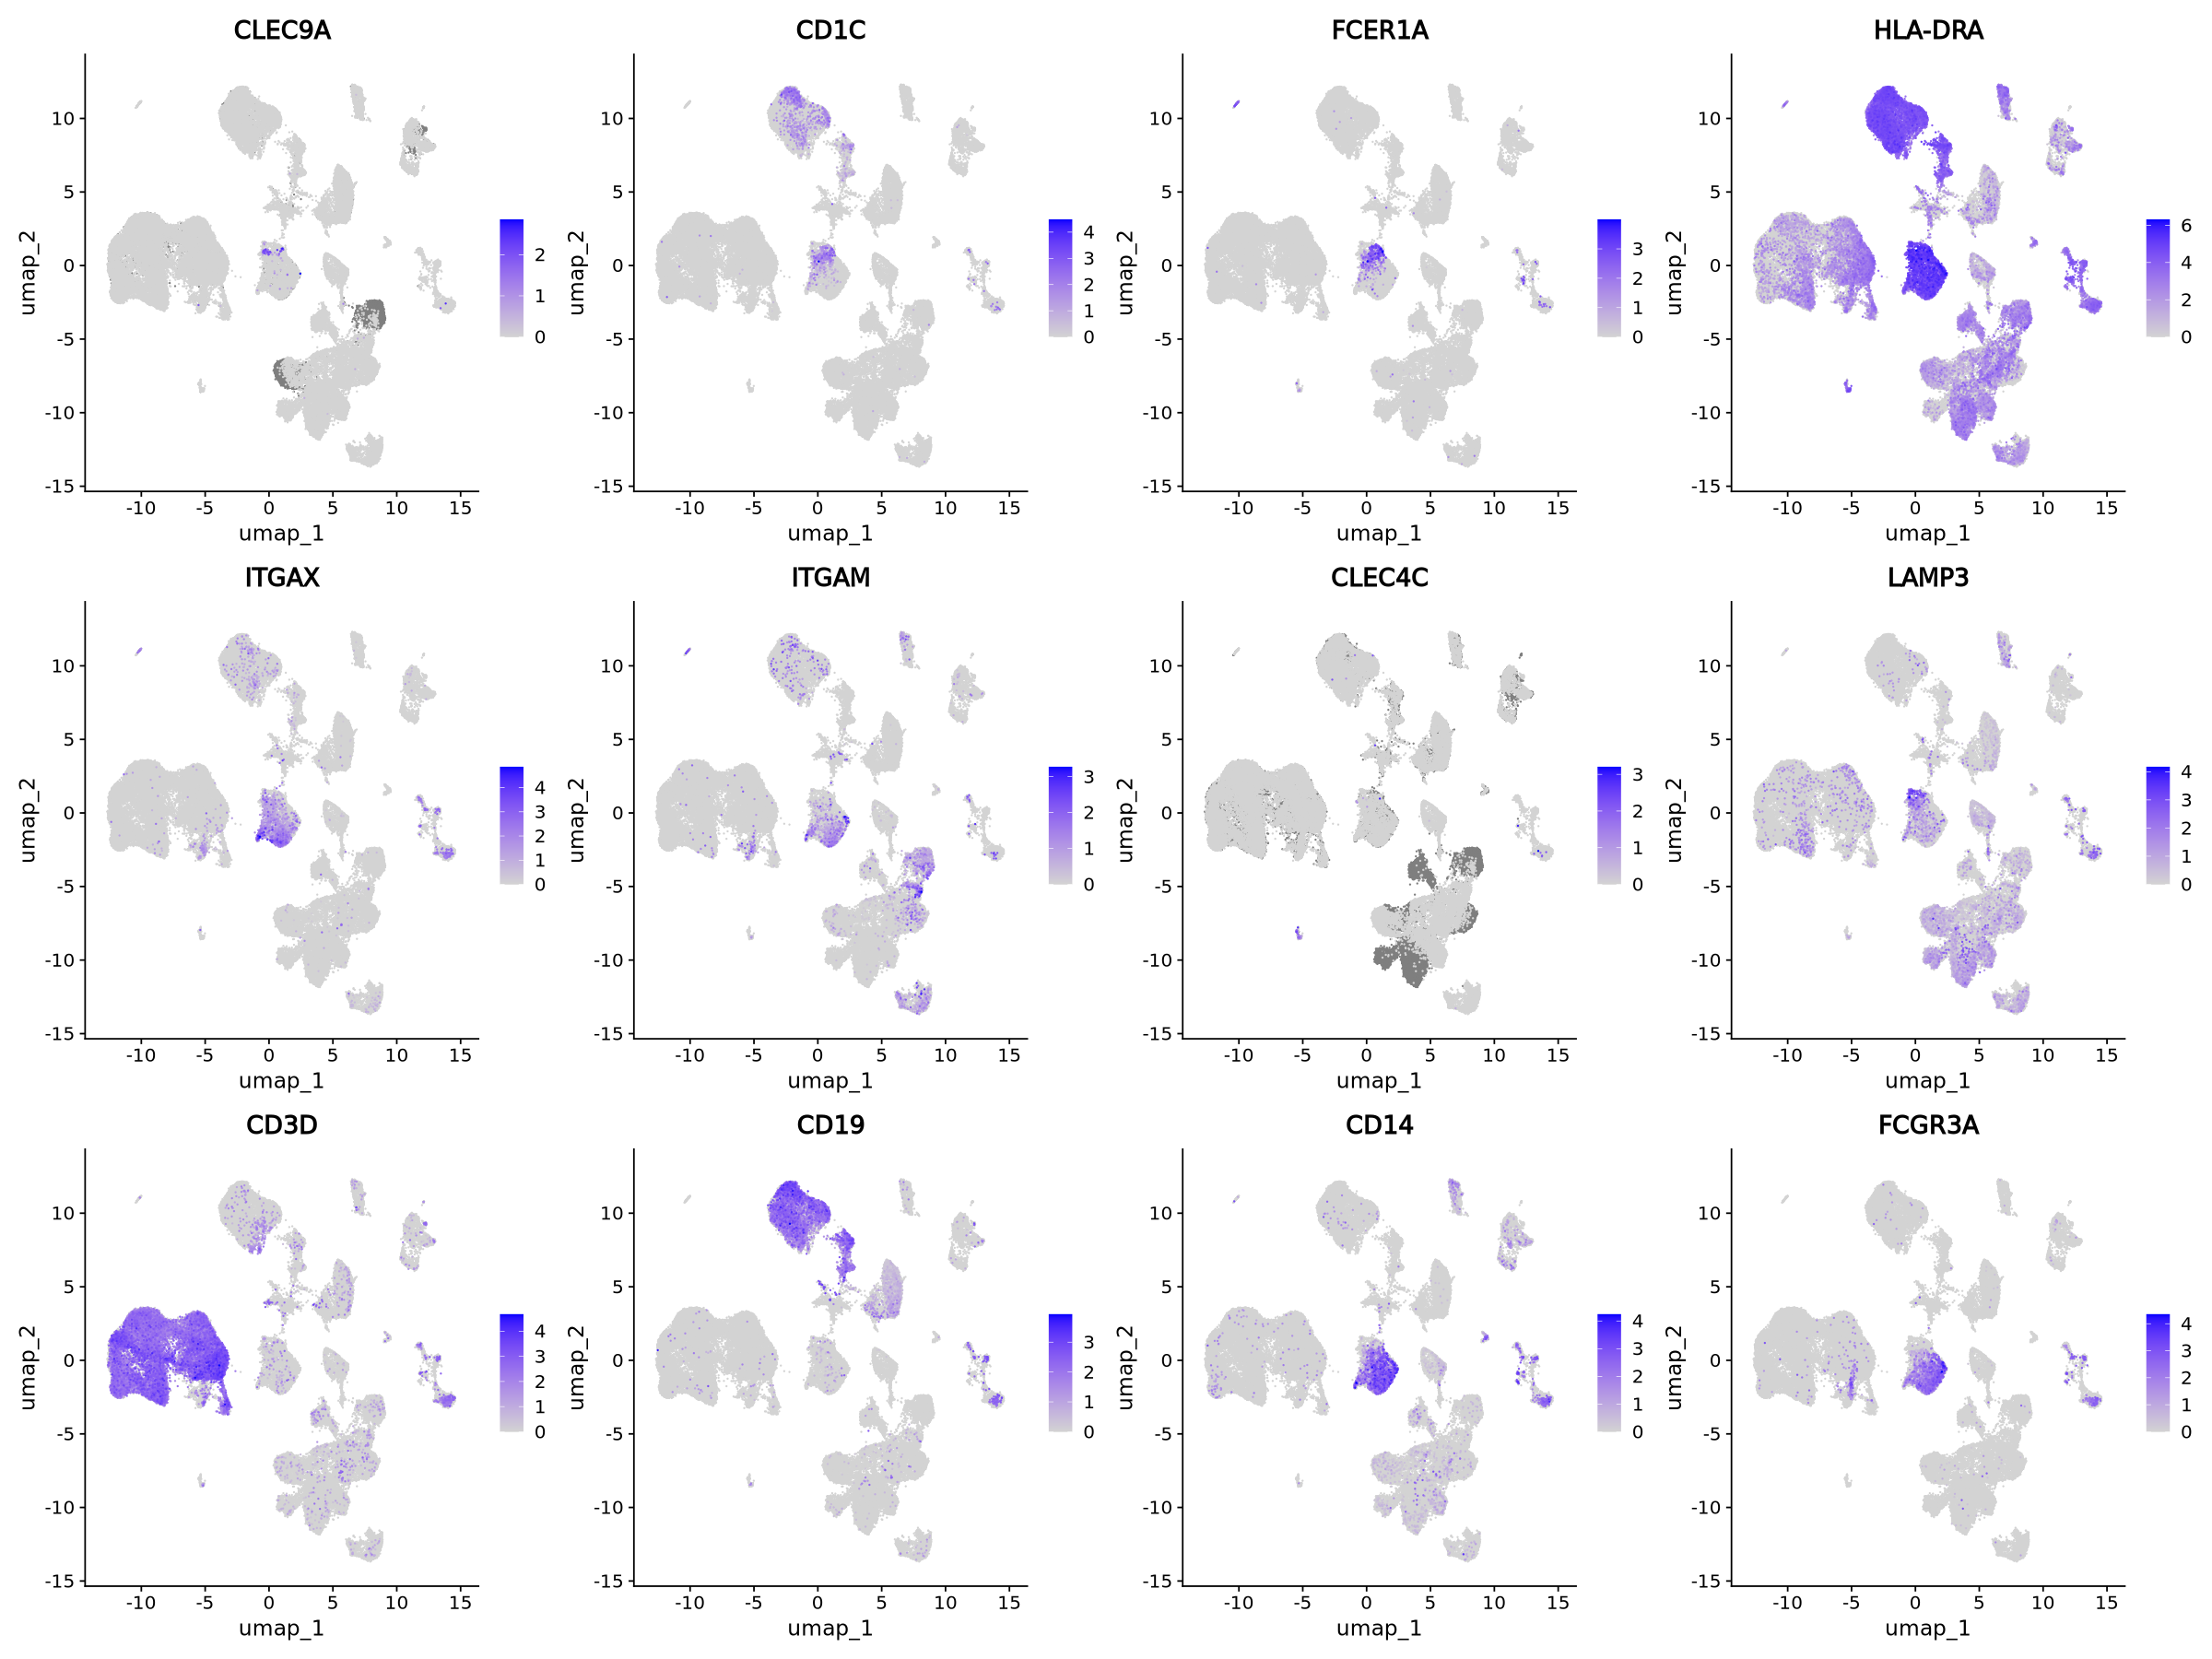

In [31]:
#Same again but plotted over UMAP
options(repr.plot.height=8, repr.plot.width=8)
DimPlot(HNSCC, reduction = "umap", label=TRUE)

options(repr.plot.height=15, repr.plot.width=20)
FeaturePlot(HNSCC, features = c("CLEC9A", "CD1C", "FCER1A", "HLA-DRA", "ITGAX", "ITGAM", "CLEC4C", "LAMP3", "CD3D", "CD19", "CD14", "FCGR3A"), order = TRUE)

#### From above it looks like cluster 5 contains myeloid cells, subsetting out cluster 5


In [32]:
head(HNSCC@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample_type,cancer_type,patient_id,percent.mt,RNA_snn_res.0.2,seurat_clusters
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<fct>,<fct>
GSE173468_N3_AAACCTGAGAGCCTAG-1,GSE173468,2128,817,healthy,HNSCC_healthy,N3,2.6315789,0,0
GSE173468_N3_AAACCTGCAAGAAGAG-1,GSE173468,2158,682,healthy,HNSCC_healthy,N3,0.5097312,0,0
GSE173468_N3_AAACCTGGTCTCCATC-1,GSE173468,4827,1330,healthy,HNSCC_healthy,N3,4.3712451,1,1
GSE173468_N3_AAACCTGTCTATGTGG-1,GSE173468,3379,1434,healthy,HNSCC_healthy,N3,0.7694584,0,0
GSE173468_N3_AAACGGGAGGGTTTCT-1,GSE173468,849,478,healthy,HNSCC_healthy,N3,2.7090695,0,0
GSE173468_N3_AAACGGGCAATACGCT-1,GSE173468,6315,2460,healthy,HNSCC_healthy,N3,1.1243072,8,8


In [33]:
myeloid_HNSCC <- subset(HNSCC, subset = RNA_snn_res.0.2 %in% c("5"))

In [34]:
myeloid_HNSCC

An object of class Seurat 
25144 features across 4410 samples within 1 assay 
Active assay: RNA (25144 features, 2000 variable features)
 37 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, counts.17, counts.18, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, data.13, data.14, data.15, data.16, data.17, data.18, scale.data
 2 dimensional reductions calculated: pca, umap

In [35]:
saveRDS(myeloid_HNSCC, "/scratch/user/s4436039/scdata/GSE173468/GSE173468_myeloid.RDS")

Following the above then need to move entire GSE173468 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE173468/ /QRISdata/Q5935/nikita/scdata/GSE173468
```